In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report


In [ ]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Loan%20Eligibility%20Prediction.csv")

In [ ]:
df.head(3)

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y


In [ ]:
df.isnull().sum()

Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.812704,0.649837,0.856678,0.218241,0.148208,5403.459283,1621.245798,142.022801,338.892508,0.850163,1.087948,0.687296
std,177.390811,0.390467,0.477410,1.216651,0.413389,0.355596,6109.041673,2926.248369,87.083089,69.716355,0.357203,0.815081,0.463973
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,154.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000,0.000000,0.000000
50%,307.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,460.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,614.000000,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


**Before Preprocessing**

In [ ]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [ ]:
df['Gender']=pd.get_dummies(df['Gender'],dtype=int,drop_first=True)

In [ ]:
df['Married']=pd.get_dummies(df['Married'],dtype=int,drop_first=True)

In [ ]:
df['Education']=pd.get_dummies(df['Education'],dtype=int,drop_first=True)

In [ ]:
df['Self_Employed']=pd.get_dummies(df['Self_Employed'],dtype=int,drop_first=True)

In [ ]:
df['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [ ]:
df['Property_Area'].replace(['Urban','Semiurban','Rural'],[1,2,0],inplace=True)

In [ ]:
print(df['Property_Area'])

0      1
1      1
2      2
3      2
4      2
      ..
609    1
610    2
611    0
612    0
613    1
Name: Property_Area, Length: 614, dtype: int64


In [ ]:
df['Loan_Status']=pd.get_dummies(df['Loan_Status'],dtype=int,drop_first=True)

**After PreProcessing**

In [ ]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,0,0,0,0,0,2378,0.0,9,360,1,1,0
1,15,1,1,2,0,0,1299,1086.0,17,120,1,1,1
2,95,1,0,0,1,0,3620,0.0,25,120,1,2,1
3,134,1,1,0,0,1,3459,0.0,25,120,1,2,1
4,556,1,1,1,0,0,5468,1032.0,26,360,1,2,1


**Visualization**

<Axes: xlabel='Loan_Status', ylabel='count'>

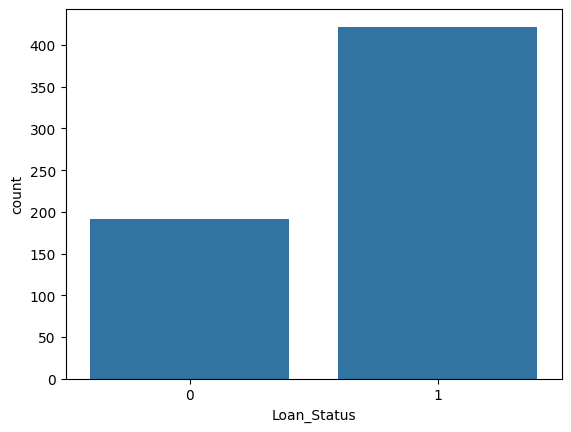

In [ ]:
sns.countplot(x=df['Loan_Status'])

In [ ]:
X=df.drop(['Customer_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,2378,0.0,9,360,1,1
1,1,1,2,0,0,1299,1086.0,17,120,1,1
2,1,0,0,1,0,3620,0.0,25,120,1,2
3,1,1,0,0,1,3459,0.0,25,120,1,2
4,1,1,1,0,0,5468,1032.0,26,360,1,2


In [ ]:
Y.head()

0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=80)

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)

In [ ]:
log.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
pred=log.predict(x_test)

In [ ]:
print("Model Accuracy is : ",accuracy_score(pred,y_test))

Model Accuracy is :  0.8054054054054054


In [ ]:
!pip install gradio


In [ ]:
x_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
x_train.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
580,1,0,0,0,0,20233,0.0,480,360,1,0
403,0,0,0,1,0,4350,0.0,154,360,1,0
294,1,1,2,0,0,4400,0.0,127,360,0,2


In [ ]:
def predicto(Gender,Marrage_Status,Number_of_Dependents,Education_Status,Employee_Status,Applicant_Income,Co_Applicant_Income,Loan_Amount_in_Thoushands,Loan_Amount_Term_in_days,Credit_History,Property_Area):
  d={'Gender':Gender,
     'Married':Marrage_Status,
     'Dependents':Number_of_Dependents,
     'Education':Education_Status,
     'Self_Employed':Employee_Status,
     'Applicant_Income':Applicant_Income,
     'Coapplicant_Income':Co_Applicant_Income,
     'Loan_Amount':Loan_Amount_in_Thoushands,
     'Loan_Amount_Term':Loan_Amount_Term_in_days,
     'Credit_History':Credit_History,
     'Property_Area':Property_Area
  }
  sample=pd.DataFrame(d, index=[0])
  res=model.predict(sample)
  if res == 0:
    return "Not Eligible For Loan"
  else:
    return "Eligible For Loan "

In [ ]:
x=predicto(0,0,1,0,1,23378,0.0,9,360,1,1)
print(x)

Eligible For Loan 


In [ ]:
import gradio as gr

In [ ]:
app=gr.Interface(predicto,
                 inputs=[gr.Radio([1,0],label="Select Gender ",info="1 for Male   ,  0 for FeMale"),
                 gr.Radio([1,0],label="Select Marrage Status ",info="1 for Married   ,  0 for Not Married"),
                 gr.Slider(0,10,step=1),
                 gr.Radio([1,0],label="Select Education Status ",info="1 for Not-Graduate   ,  0 for Graduate"),
                 gr.Radio([1,0],label="Select Employement Status ",info="1 for Self-Employee   ,  0 for Not Self-Employee"),
                 gr.Slider(0,100000,step=1000),
                 gr.Slider(0,10000,step=1000),
                 gr.Slider(0,100,step=1),
                 gr.Slider(0,500,step=45),
                 gr.Slider(0,10,step=1),
                 gr.Radio([0,1,2],label="Select Property Area Status ",info="1 for Urban, 2 for Semi-Urban, 3. for Rural")],
                 outputs="textbox",

                 title="Loan Eligibility Prediction Project\n Build By Abhishek C B [An ML Enthusiast] on April-2024",
                 description="Experience seamless Loan Eligibility Prediction through my web-based ML project, leveraging Gradio for intuitive UI design and logistic regression 🤖for precise analysis. Users input key factors like income and credit record to swiftly determine loan qualification. Our platform simplifies the process, offering clear guidance and accurate predictions 💡in moments. Empowering individuals with financial insights, it facilitates informed decisions for major purchases or financial assistance. Join us in embracing the future of lending analysis, where advanced technology meets user-friendly🤝 accessibility. Make confident choices today with our innovative solution at your fingertips🤞!")

In [ ]:
app.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c2950faa6dda01a79f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
